In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 384 kB in 2s (182 kB/s)
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
Package python-dev is not available, but is referred to by another package.
This may mean that the package is missing, has 

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
E: Package 'python-dev' has no installation candidate


In [ ]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud, ImageColorGenerator

In [ ]:
import os
import sys
import urllib.request
import datetime
import time
import json


client_id = 'pQ1gqFQ8M16UrL_IiDLG'
client_secret = 'Qk1Jbn7Fh7'


#[CODE 1]
def getRequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)

    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

#[CODE 2]
def getNaverSearch(node, srcText, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)

    url = base + node + parameters
    responseDecode = getRequestUrl(url)   #[CODE 1]

    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def getPostData(post, jsonResult, cnt):
    title = post['title']
    description = post['description']
    link = post['link']
    originallink = post['originallink']

    pDate = datetime.datetime.strptime(post['pubDate'],  '%a, %d %b %Y %H:%M:%S %z')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')

    jsonResult.append({'cnt':cnt, 'title':title, 'description': description,  'link': link,  'originallink':originallink, 'pDate':pDate})
    return

# 크롤링 할 대상: news - 네이버 뉴스, blog - 네이버 블로그
# node = 'blog'
node = 'news'
srcText = input('검색어를 입력하세요: ')
cnt = 0
responseCnt = 0
jsonResult = []

jsonResponse = getNaverSearch(node, srcText, 1, 100)  #[CODE 2]
total = jsonResponse['total']
if jsonResponse != None:
    responseCnt += 1

while ((jsonResponse != None) and (jsonResponse['display'] != 0) and responseCnt < 20):
    for post in jsonResponse['items']:
        cnt += 1
        getPostData(post, jsonResult, cnt)  #[CODE 3]

    start = jsonResponse['start'] + jsonResponse['display']
    jsonResponse = getNaverSearch(node, srcText, start, 100)  #[CODE 2]
    responseCnt += 1

print('전체 검색 : %d 건' %total)

with open('%s_naver_%s.json' % (srcText, node), 'w', encoding='utf8') as outfile:
    jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)

    outfile.write(jsonFile)

print("가져온 데이터 : %d 건" %(cnt))
print ('%s_naver_%s.json SAVED' % (srcText, node))


검색어를 입력하세요: 핫식스 에너지드링크
[2024-11-16 06:59:12.224207] Url Request Success
[2024-11-16 06:59:12.720377] Url Request Success
[2024-11-16 06:59:13.168963] Url Request Success
[2024-11-16 06:59:13.636623] Url Request Success
[2024-11-16 06:59:14.076832] Url Request Success
[2024-11-16 06:59:14.529151] Url Request Success
[2024-11-16 06:59:14.995754] Url Request Success
[2024-11-16 06:59:15.468314] Url Request Success
[2024-11-16 06:59:16.017701] Url Request Success
[2024-11-16 06:59:16.667803] Url Request Success
HTTP Error 400: Bad Request
[2024-11-16 06:59:16.968647] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%ED%95%AB%EC%8B%9D%EC%8A%A4%20%EC%97%90%EB%84%88%EC%A7%80%EB%93%9C%EB%A7%81%ED%81%AC&start=1001&display=100
전체 검색 : 1057 건
가져온 데이터 : 1000 건
핫식스 에너지드링크_naver_news.json SAVED


In [ ]:
inputFileName = '/content/핫식스 에너지드링크_naver_news'
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data #출력하여 내용 확인

[{'cnt': 1,
  'description': "&lt;동아제약&gt; △박카스, 피로회복제 시장에서 60년간 부동의 업계 1위 박카스는 2024년 현재 국내에서 가장 많이 팔리는 '<b>에너지 드링크</b>'다. 글로벌 최강자인 '레드불'도, 대기업 롯데칠성음료가 판매하는 '<b>핫식스</b>'도... ",
  'link': 'https://www.businesspost.co.kr/BP?command=article_view&num=368655',
  'originallink': 'https://www.businesspost.co.kr/BP?command=article_view&num=368655',
  'pDate': '2024-10-14 08:38:00',
  'title': '[Who Is ?] 강정석 동아쏘시오홀딩스 회장'},
 {'cnt': 2,
  'description': '고카페인 함유식품은 레드불, <b>핫식스</b>, 몬스터 등의 <b>에너지 드링크</b>가 주를 이뤘다. 특히 한부모, 조손가정의 아동이 고카페인 함유식품 섭취 비중이 상대적으로 높았고, 중위소득 50% 미만의 저소득층의 아동도... ',
  'link': 'https://n.news.naver.com/mnews/article/016/0002360878?sid=102',
  'originallink': 'https://news.heraldcorp.com/view.php?ud=20240910050194',
  'pDate': '2024-09-10 10:18:00',
  'title': '아동 10명 중 1명은 고카페인 지속 섭취…공부 잘하는 약도 상습 복용'},
 {'cnt': 3,
  'description': "<b>핫식스</b> 파인애플·애플망고향 개발 카테고리별 매출 최고 상승률 기록 롯데칠성음료가 <b>에너지드링크</b> 매출이 가파르게 상승하자 '<b>핫식스</b>' 신제품 출시를 검토하고 있는 것으로 나타났다. 매출 증가세를 이어 나가기... ",
  'link

In [ ]:
message = ''

for item in data:
#    if 'message' in item.keys():
#        message = message + re.sub(r'[^\w]', ' ', item['message']) +''
    if 'description' in item.keys():
        message = message + re.sub(r'[^\w]', ' ', item['description']) +''

message #출력하여 내용 확인

' lt 동아제약 gt   박카스  피로회복제 시장에서 60년간 부동의 업계 1위 박카스는 2024년 현재 국내에서 가장 많이 팔리는   b 에너지 드링크  b  다  글로벌 최강자인  레드불 도  대기업 롯데칠성음료가 판매하는   b 핫식스  b  도    고카페인 함유식품은 레드불   b 핫식스  b   몬스터 등의  b 에너지 드링크  b 가 주를 이뤘다  특히 한부모  조손가정의 아동이 고카페인 함유식품 섭취 비중이 상대적으로 높았고  중위소득 50  미만의 저소득층의 아동도     b 핫식스  b  파인애플 애플망고향 개발 카테고리별 매출 최고 상승률 기록 롯데칠성음료가  b 에너지드링크  b  매출이 가파르게 상승하자   b 핫식스  b   신제품 출시를 검토하고 있는 것으로 나타났다  매출 증가세를 이어 나가기     b 핫식스  b  파인애플 애플망고향 개발 카테고리별 매출 최고 상승률 기록 롯데칠성음료가  b 에너지드링크  b  매출이 가파르게 상승하자   b 핫식스  b   신제품 출시를 검토하고 있는 것으로 나타났다  매출 증가세를 이어나가기     빙그레  더 단백  b 드링크  b   멜론  선봬 빙그레는 총 6종이었던  더 단백   b 드링크  b  제품에 신규 향료인  멜론    콘트라베이스     b 핫식스  b     트레비  등 커피부터 주스   b 에너지  b 음료까지 20개 인기 음료 브랜드가 10  25 까지    빙그레 005180 는 총 6종이었던  더 단백   b 드링크  b  제품에 신규 향료로 멜론을 추가한다  2021년 5월  b 드링크  b  초코    행사 대상은  펩시콜라 를 필두로  칸타타 콘트라베이스   b 핫식스  b   트레비 등 20개 인기 음료 브랜드가     더 단백   b 드링크  b  멜론 빙그레 대표이사 전창원 가 총 6종이었던  더 단백   b 드링크  b  제품에 신규 향료로    대상은 대표 탄산음료  펩시콜라 를 필두로  칸타타 콘트라베이스     b 핫식스  b     트레비  등

In [ ]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N   #출력하여 내용 확인

['동아제약',
 '박카스',
 '피로',
 '회복',
 '제',
 '시장',
 '부동',
 '업계',
 '위',
 '박카스',
 '현재',
 '국내',
 '가장',
 '에너지',
 '드',
 '링크',
 '글로벌',
 '최강',
 '레드불',
 '도',
 '대기업',
 '롯데',
 '음료',
 '판매',
 '핫식스',
 '도',
 '카페인',
 '함유',
 '식품',
 '레드불',
 '핫식스',
 '몬스터',
 '등',
 '에너지',
 '드',
 '링크',
 '주',
 '한부모',
 '손',
 '정의',
 '아동',
 '카페인',
 '함유',
 '식품',
 '섭취',
 '비중',
 '상대',
 '중위',
 '소득',
 '미만',
 '소득',
 '층',
 '아동',
 '핫식스',
 '파인애플',
 '애플',
 '망',
 '고향',
 '개발',
 '카테고리',
 '별',
 '매출',
 '최고',
 '상',
 '승률',
 '기록',
 '롯데',
 '음료',
 '에너지드링크',
 '매출',
 '가파르',
 '상승',
 '핫식스',
 '신제품',
 '출시',
 '검토',
 '것',
 '매출',
 '증가',
 '세',
 '핫식스',
 '파인애플',
 '애플',
 '망',
 '고향',
 '개발',
 '카테고리',
 '별',
 '매출',
 '최고',
 '상',
 '승률',
 '기록',
 '롯데',
 '음료',
 '에너지드링크',
 '매출',
 '가파르',
 '상승',
 '핫식스',
 '신제품',
 '출시',
 '검토',
 '것',
 '매출',
 '증가',
 '세',
 '가기',
 '빙그레',
 '더',
 '단백',
 '드',
 '링크',
 '멜론',
 '선봬',
 '빙그레',
 '총',
 '종',
 '더',
 '단백',
 '드',
 '링크',
 '제품',
 '신규',
 '향료',
 '멜론',
 '콘트라베이스',
 '핫식스',
 '트',
 '레비',
 '등',
 '커피',
 '주스',
 '에너지',
 '음료',
 '개',
 '인기',
 '음료',
 '브랜드',
 '빙그레',

In [ ]:
count = Counter(message_N)

count   #출력하여 내용 확인

Counter({'동아제약': 13,
         '박카스': 77,
         '피로': 35,
         '회복': 23,
         '제': 11,
         '시장': 121,
         '부동': 1,
         '업계': 35,
         '위': 93,
         '현재': 15,
         '국내': 143,
         '가장': 27,
         '에너지': 681,
         '드': 537,
         '링크': 537,
         '글로벌': 17,
         '최강': 6,
         '레드불': 215,
         '도': 21,
         '대기업': 2,
         '롯데': 711,
         '음료': 959,
         '판매': 72,
         '핫식스': 1414,
         '카페인': 239,
         '함유': 53,
         '식품': 16,
         '몬스터': 67,
         '등': 338,
         '주': 14,
         '한부모': 1,
         '손': 1,
         '정의': 1,
         '아동': 2,
         '섭취': 10,
         '비중': 1,
         '상대': 3,
         '중위': 1,
         '소득': 2,
         '미만': 1,
         '층': 23,
         '파인애플': 2,
         '애플': 3,
         '망': 2,
         '고향': 2,
         '개발': 6,
         '카테고리': 5,
         '별': 3,
         '매출': 80,
         '최고': 3,
         '상': 5,
         '승률': 2,
         '기록': 16,

In [ ]:
word_count = dict()

for tag, counts in count.most_common(200):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

핫식스 : 1414
음료 : 959
롯데 : 711
에너지 : 681
에너지드링크 : 549
링크 : 537
더킹 : 416
공식 : 289
카페인 : 239
아프리카 : 221
레드불 : 215
진행 : 188
시즌 : 182
칠성 : 175
제품 : 168
디제이 : 166
페스티벌 : 164
참여 : 157
이벤트 : 152
후원 : 151
한편 : 144
국내 : 143
출시 : 137
스포츠 : 131
월드 : 129
대회 : 127
시장 : 121
스폰서 : 118
생중계 : 105
브랜드 : 99
통해 : 97
이번 : 97
페이지 : 96
제로 : 93
확인 : 93
제공 : 88
시청 : 87
함량 : 84
매출 : 80
지난 : 79
과천 : 79
랜드 : 78
박카스 : 77
대표 : 77
타우린 : 74
고객 : 74
판매 : 72
아반떼 : 71
소비자 : 70
몬스터 : 67
과즙 : 66
편의점 : 64
퍼플 : 63
그레이 : 62
지난해 : 61
오프라인 : 60
사진 : 59
과라나 : 58
인기 : 57
포도 : 56
전국 : 55
칼로리 : 55
함유 : 53
블루베리 : 53
집중 : 53
마트 : 52
사항 : 52
콘셉트 : 52
리뉴얼 : 51
비타민 : 51
방송국 : 50
최근 : 49
디자인 : 48
추출 : 47
구매 : 47
강화 : 46
홍삼 : 46
커피 : 45
행사 : 45
평균 : 45
포함 : 44
세계 : 43
아이오 : 42
버전 : 42
대상 : 41
목적 : 41
기존 : 40
크러쉬 : 40
피치 : 40
선택 : 39
위해 : 39
표현 : 39
파워 : 39
인증 : 39
비타 : 38
전용 : 38
제휴 : 38
인쇄 : 37
번호 : 37
코카콜라 : 36
피로 : 35
업계 : 35
자동차 : 35
자리 : 35
슈퍼 : 35
선착순 : 35
아미노산 : 35
렌터카 : 35
해당 : 34
또한 : 34
무료 : 34
타이어 : 34
전원 : 34
이상 : 33
현대 : 33
경기

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
import matplotlib.font_manager as fm
from PIL import Image
import numpy as np
font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf"
font_name = fm.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font_name)
#fm._rebuild()

In [ ]:
icon = Image.open('/content/netflix.png') # 넷플릭스

In [ ]:
icon = Image.open('/content/monster.png') # 몬스터

In [ ]:
icon = Image.open('/content/redbull.png') # 레드불

In [ ]:
icon = Image.open('/content/hotsix.png') # 핫식스

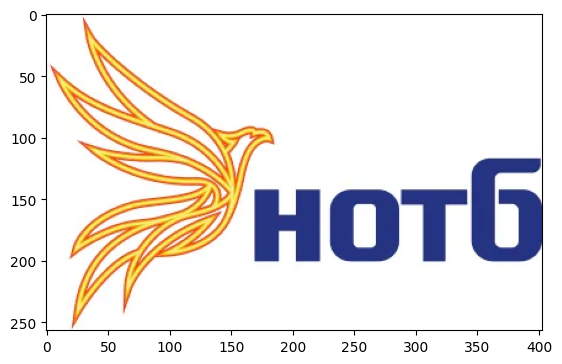

In [ ]:
plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon, icon)
mask = np.array(mask)

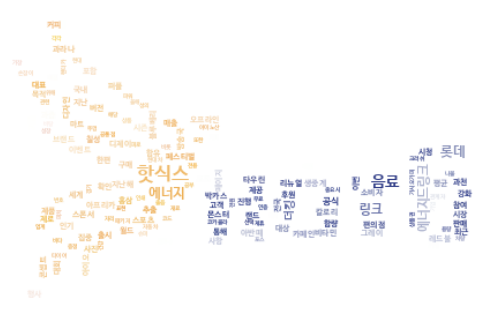

In [ ]:
wc = WordCloud(font_path, background_color='white', width=600, height=800, max_words=200, mask=mask)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(6,6))
plt.axis('off')

image_colors = ImageColorGenerator(mask)
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.show()

In [ ]:
cloud.to_file(inputFileName + '_cloud.jpg')